In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import numpy as np


In [2]:
# Read the CSV file
#df_user = pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/includes/Demand/user_demand_cambridge_oct7_2019_week.csv')
#df_food= pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/includes/Demand/food_demand_cambridge_week.csv')

#df_user = pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Rides/ride_demand_ss_1week_scattered.csv')
#df_food= pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Deliveries/delivery_demand_ss_1week_scattered.csv')

df_user = pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Rides/ride_demand_ss_1week_scattered_fipped_small.csv')
df_food= pd.read_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Deliveries/delivery_demand_ss_1week_scattered_small.csv')

In [3]:
df_user.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID_viaje', 'Estado cerrado', 'Duracion',
       'Id de estacion de inicio', 'Fecha de inicio',
       'Nombre de estacion de inicio', 'Fecha de fin',
       'Id de estacion de fin de viaje', 'Nombre de estacion de fin de viaje',
       'ID de ciclista', 'Msnbc de bicicleta', 'Moto identificador publico',
       'Modelo de bicicleta', 'Nombre de producto', 'start_lat', 'start_lon',
       'target_lat', 'target_lon', 'starttime', 'withinC', 'withinCend',
       'day'],
      dtype='object')

In [4]:
df_user_pt = df_user[['start_lat','start_lon']]
df_food_pt = df_food[['start_latitude','start_longitude']]

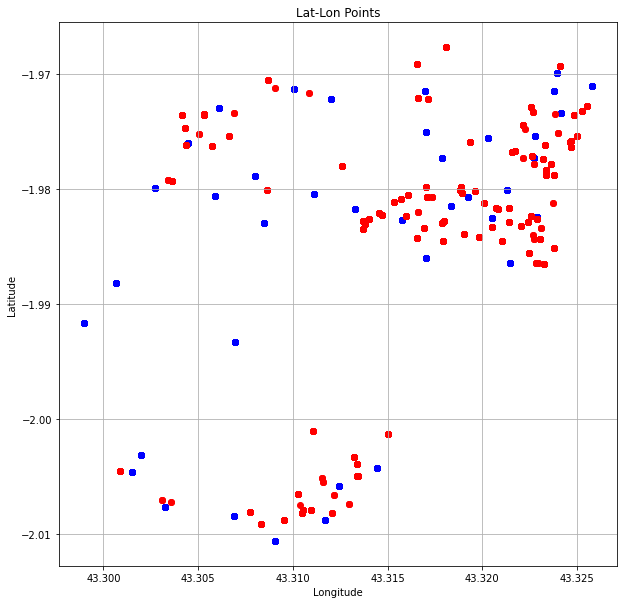

In [5]:
# Create a scatter plot
plt.figure(figsize=(10, 10)) 
plt.scatter(df_user_pt['start_lat'], df_user_pt['start_lon'], color='blue', marker='o')
plt.scatter(df_food_pt['start_latitude'], df_food_pt['start_longitude'], color='red', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Lat-Lon Points')
plt.grid(True)
plt.show()


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


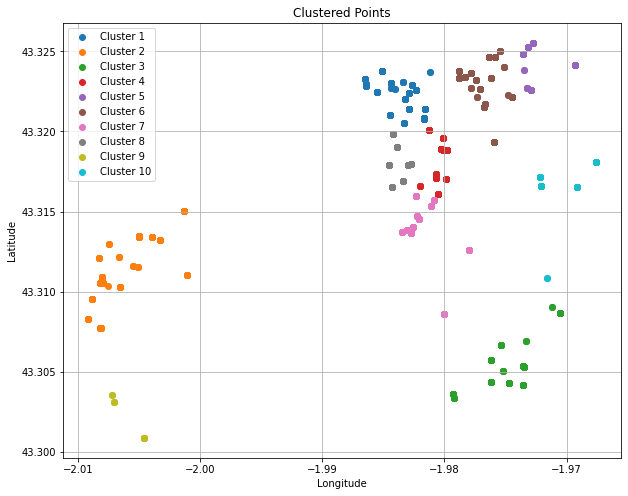

In [6]:
##FOOD CLUSTERS###


# Number of clusters
num_clusters = 10  # You can adjust this based on your needs

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df_food_pt['cluster'] = kmeans.fit_predict(df_food_pt[['start_latitude', 'start_longitude']])

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
for cluster_num in range(num_clusters):
    cluster_points = df_food_pt[df_food_pt['cluster'] == cluster_num]
    plt.scatter(cluster_points['start_longitude'], cluster_points['start_latitude'], label=f'Cluster {cluster_num + 1}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Points')
plt.grid(True)
plt.legend()
plt.show()


KMeans(n_clusters=10, random_state=0)


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


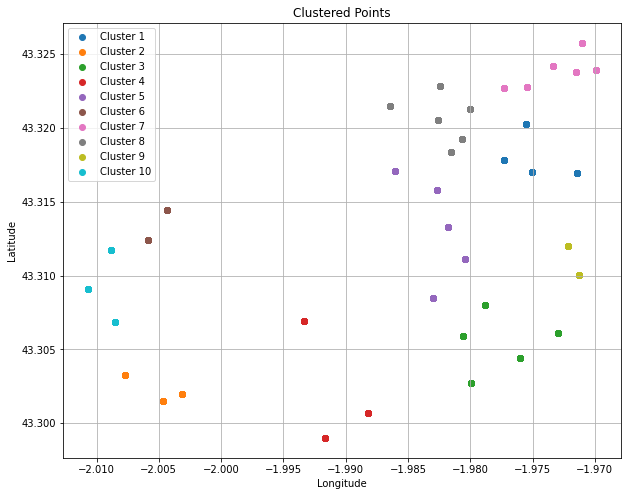

In [7]:
##USER CLUSTERS###


# Number of clusters
num_clusters = 10  # You can adjust this based on your needs

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

print(kmeans)
df_user_pt['cluster'] = kmeans.fit_predict(df_user_pt[['start_lat', 'start_lon']])

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
for cluster_num in range(num_clusters):
    cluster_points = df_user_pt[df_user_pt['cluster'] == cluster_num]
    plt.scatter(cluster_points['start_lon'], cluster_points['start_lat'], label=f'Cluster {cluster_num + 1}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Points')
plt.grid(True)
plt.legend()
plt.show()

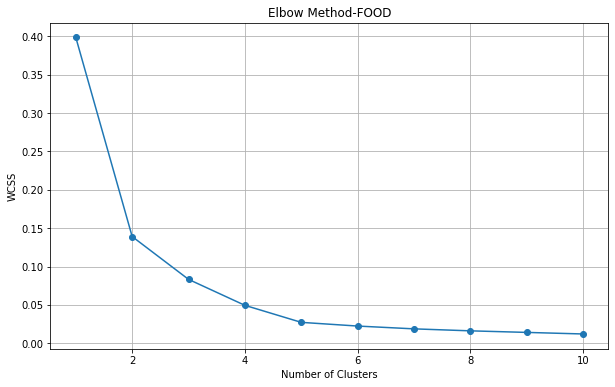

In [8]:
# Calculate WCSS for different number of clusters
wcss = []
for num_clusters in range(1, 11):  # You can adjust the range of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(df_food_pt[['start_latitude', 'start_longitude']])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method-FOOD')
plt.grid(True)
plt.show()

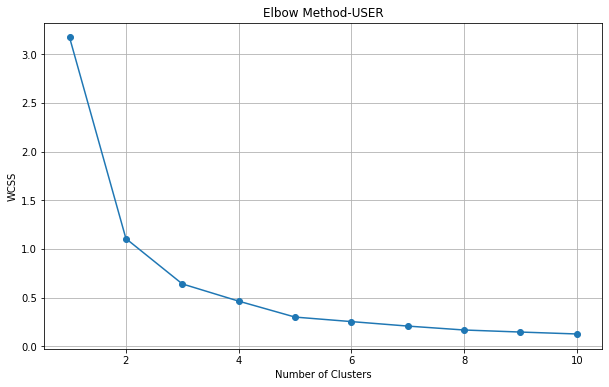

In [9]:
# Calculate WCSS for different number of clusters
wcss = []
for num_clusters in range(1, 11):  # You can adjust the range of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(df_user_pt[['start_lat', 'start_lon']])
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method-USER')
plt.grid(True)
plt.show()

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


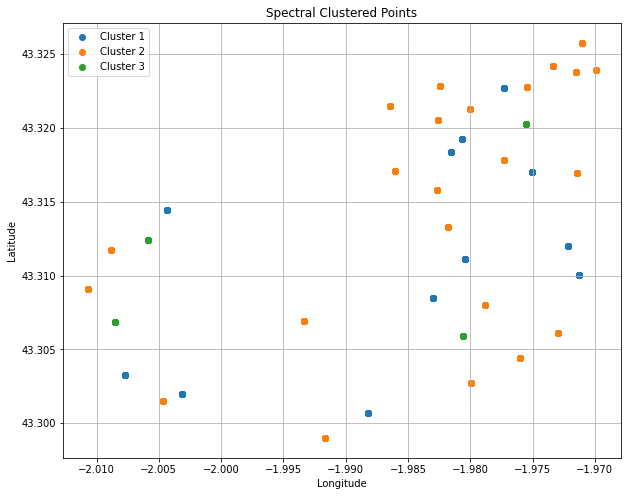

In [10]:
# Preprocessing: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_user_pt[['start_lat', 'start_lon']])

# Number of clusters
num_clusters = 3  # You can adjust this based on your needs

# Perform Spectral Clustering
spectral = SpectralClustering(n_clusters=num_clusters, affinity='nearest_neighbors', random_state=0)
df_user_pt['cluster'] = spectral.fit_predict(scaled_data)

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
for cluster_num in range(num_clusters):
    cluster_points = df_user_pt[df_user_pt['cluster'] == cluster_num]
    plt.scatter(cluster_points['start_lon'], cluster_points['start_lat'], label=f'Cluster {cluster_num + 1}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spectral Clustered Points')
plt.grid(True)
plt.legend()
plt.show()


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


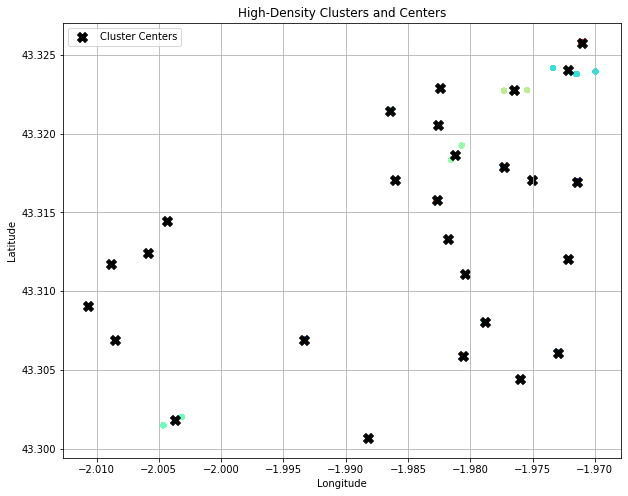

In [11]:


# Preprocessing: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_user[['start_lat', 'start_lon']])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=300)  # Adjust eps and min_samples based on your data
df_user_pt['cluster'] = dbscan.fit_predict(scaled_data)

# Extract high-density clusters
df_high_density = df_user_pt[df_user_pt['cluster'] != -1]  # -1 indicates noise points

# Calculate cluster centers
cluster_centers = []
for cluster_num in df_high_density['cluster'].unique():
    cluster_points = df_high_density[df_high_density['cluster'] == cluster_num]
    cluster_center = cluster_points[['start_lat', 'start_lon']].mean()
    cluster_centers.append(cluster_center)

# Visualize high-density clusters and centers
plt.figure(figsize=(10, 8))
plt.scatter(df_high_density['start_lon'], df_high_density['start_lat'], c=df_high_density['cluster'], cmap='rainbow', s=20)
plt.scatter([center['start_lon'] for center in cluster_centers], [center['start_lat'] for center in cluster_centers], color='black', marker='X', s=100, label='Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('High-Density Clusters and Centers')
plt.grid(True)
plt.legend()
plt.show()


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


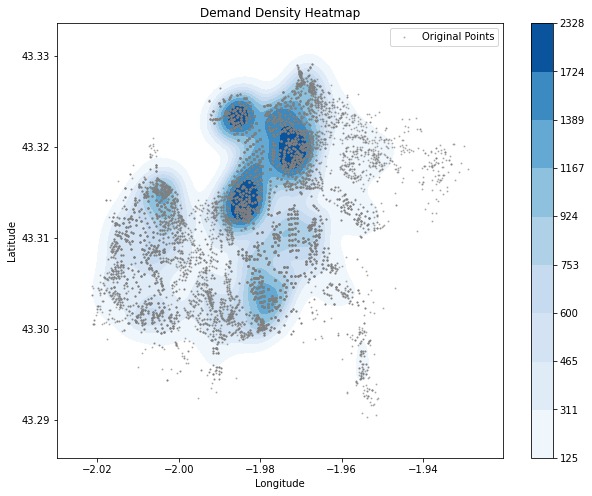

In [19]:
import seaborn as sns


# Create a KDE plot for demand density heatmap
plt.figure(figsize=(10, 8))

#Plot heatmap
sns.kdeplot(df_user_pt['start_lon'], df_user_pt['start_lat'], cmap='Blues', fill=True, cbar=True)



# Overlay the original points in a lighter shade
plt.scatter(df_user_pt['start_lon'], df_user_pt['start_lat'], color='grey', alpha=0.5, s=1, label='Original Points',  zorder=1)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Demand Density Heatmap')
plt.legend()
plt.show()


/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


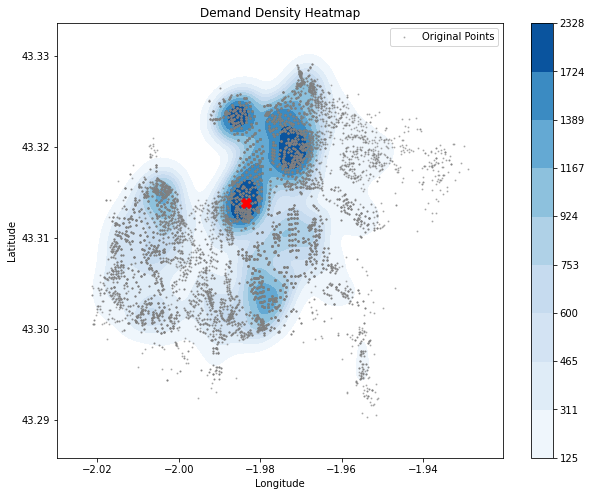

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_user_pt is your DataFrame
X = df_user_pt[['start_lat', 'start_lon']]

plt.figure(figsize=(10, 8))

# Create the KDE plot for demand density heatmap
sns.kdeplot(df_user_pt['start_lon'], df_user_pt['start_lat'], cmap='Blues', fill=True, cbar=True)

# Overlay the original points in a lighter shade
plt.scatter(df_user_pt['start_lon'], df_user_pt['start_lat'], color='grey', alpha=0.5, s=1, label='Original Points',  zorder=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Demand Density Heatmap')
plt.legend()

# Calculate the KDE density values using scipy's gaussian_kde
from scipy.stats import gaussian_kde
kde = gaussian_kde([X['start_lon'], X['start_lat']])
density_values = kde([X['start_lon'], X['start_lat']])

# Find the index of the maximum density value
max_density_index = density_values.argmax()

# Get the corresponding latitude and longitude values
center_lat = X['start_lat'].iloc[max_density_index]
center_lon = X['start_lon'].iloc[max_density_index]

# Mark the center of the highest density area
plt.scatter(center_lon, center_lat, color='red', marker='X', s=100, label='Center of Highest Density Area', zorder=2)

plt.show()



/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


KeyboardInterrupt: 

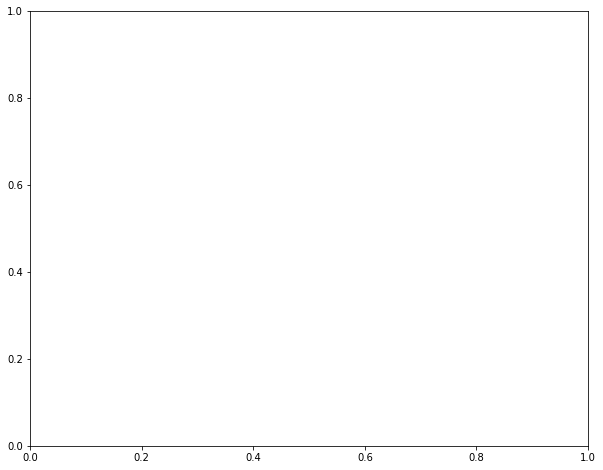

In [35]:


# Assuming df_user_pt is your DataFrame
X = df_user_pt[['start_lat', 'start_lon']]

plt.figure(figsize=(10, 8))

# Create the KDE plot for demand density heatmap
sns.kdeplot(df_user_pt['start_lon'], df_user_pt['start_lat'], cmap='Blues', fill=True, cbar=True)

# Overlay the original points in a lighter shade
plt.scatter(df_user_pt['start_lon'], df_user_pt['start_lat'], color='grey', alpha=0.5, s=1, label='Original Points',  zorder=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Demand Density Heatmap')
plt.legend()

# Calculate the KDE density values using scipy's gaussian_kde
kde = gaussian_kde([X['start_lon'], X['start_lat']])
density_values = kde([X['start_lon'], X['start_lat']])

# Get the indices of the top five density values
top_density_indices = density_values.argsort()[-5:][::-1]

# Get the corresponding latitude and longitude values for the top five areas
top_density_coordinates = X.iloc[top_density_indices]

# Mark the centers of the top five highest density areas
for index, row in top_density_coordinates.iterrows():
    plt.scatter(row['start_lon'], row['start_lat'], color='red', marker='X', s=100, label='Highest Density Area', zorder=2)

plt.show()


In [22]:
# import pandas as pd
# import geopandas as gpd
# import matplotlib.pyplot as plt
# from geopandas.tools import overlay

# # Convert DataFrame to GeoDataFrame
# geometry = gpd.points_from_xy(df_user_pt['start_lon'], df_user_pt['start_lat'])
# gdf = gpd.GeoDataFrame(df_user_pt, geometry=geometry)

# # Create base map
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# ax = world.plot(color='white', edgecolor='black')

# # Create hexagonal grid
# hex_grid = gdf.copy()
# hex_grid['geometry'] = hex_grid.geometry.buffer(0.01).convex_hull

# # Spatial join and calculate point density
# joined = overlay(hex_grid, gdf, how='intersection')
# density = joined.groupby('index_right').size().reset_index(name='density')
# hex_grid = hex_grid.merge(density, left_index=True, right_on='index_right', how='left')

# # Plot density
# hex_grid.plot(column='density', ax=ax, legend=True, cmap='YlOrRd', legend_kwds={'label': "Point Density"})
# plt.show()


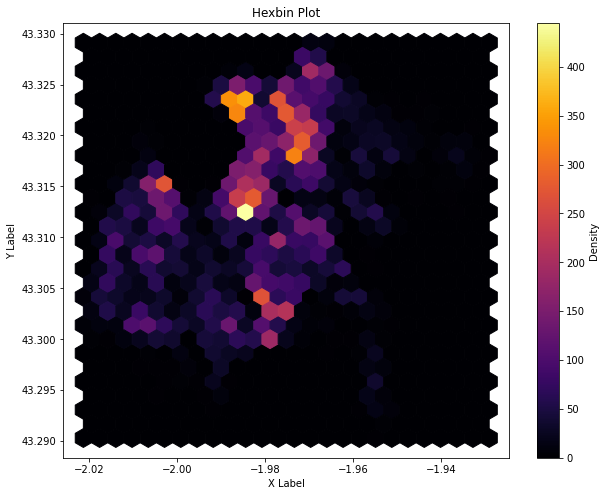

In [36]:
def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    hb = ax.hexbin(x_data, y_data, gridsize=25, cmap='inferno')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    plt.show()

# Generate hexbin plot
generate_hexbin_plot(df_user_pt['start_lon'], df_user_pt['start_lat'], 'X Label', 'Y Label', 'Hexbin Plot')

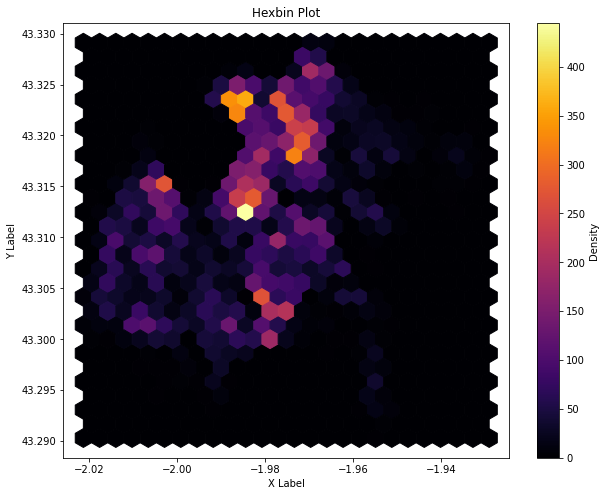

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    hb = ax.hexbin(x_data, y_data, gridsize=25, cmap='inferno')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    
    # Get hexbin centers and densities
    centers = hb.get_offsets()
    densities = hb.get_array()
    
    plt.show()
    
    # Create a DataFrame with centers and densities
    df_hexbin = pd.DataFrame({'center_x': centers[:, 0], 'center_y': centers[:, 1], 'density': densities})
    
    return df_hexbin

# Generate hexbin plot and get DataFrame with centers and densities
df_centers_densities = generate_hexbin_plot(df_user_pt['start_lon'], df_user_pt['start_lat'], 'X Label', 'Y Label', 'Hexbin Plot')


In [38]:
df_centers_densities

,center_x,center_y,density
0,-2.021238,43.290304,0.0
1,-2.021238,43.293075,0.0
2,-2.021238,43.295847,0.0
3,-2.021238,43.298618,0.0
4,-2.021238,43.301390,6.0
...,...,...,...
735,-1.930905,43.316634,2.0
736,-1.930905,43.319406,1.0
737,-1.930905,43.322177,0.0
738,-1.930905,43.324949,0.0


In [39]:
# Sort the DataFrame by density in descending order and keep the top 10 rows
df_top_10 = df_centers_densities.nlargest(10, 'density')

# Display the DataFrame with the top 10 highest density rows
print(df_top_10)

     center_x   center_y  density
158 -1.984368  43.312477    445.0
162 -1.984368  43.323563    360.0
147 -1.988055  43.323563    336.0
527 -1.986211  43.322177    328.0
205 -1.973306  43.318020    322.0
582 -1.971463  43.319406    280.0
538 -1.982524  43.313862    279.0
569 -1.975150  43.322177    277.0
84  -2.002803  43.315248    272.0
192 -1.976993  43.323563    270.0


In [40]:
#df_top_10.to_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/preprocessing/user_top10density.csv')
df_top_10.to_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Rides/rides_ss_top10density.csv')

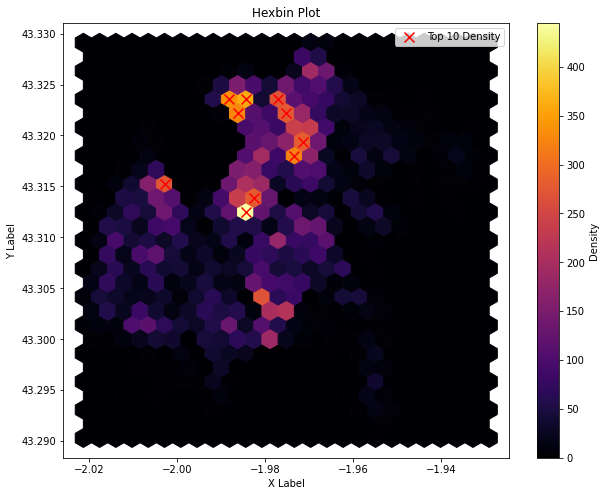

In [41]:

def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    hb = ax.hexbin(x_data, y_data, gridsize=25, cmap='inferno')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    
    # Get hexbin centers and densities
    centers = hb.get_offsets()
    densities = hb.get_array()
    
    # Create a DataFrame with centers and densities
    df_hexbin = pd.DataFrame({'center_x': centers[:, 0], 'center_y': centers[:, 1], 'density': densities})
    
    # Get the 10 hexbins with highest density
    df_top_10 = df_hexbin.nlargest(10, 'density')
    
    # Plot the hexbin centers with highest density
    ax.scatter(df_top_10['center_x'], df_top_10['center_y'], color='red', marker='x', s=100, label='Top 10 Density')
    ax.legend()
    
    plt.show()
    
    return df_hexbin

# Generate hexbin plot and get DataFrame with centers and densities
df_centers_densities = generate_hexbin_plot(df_user_pt['start_lon'], df_user_pt['start_lat'], 'X Label', 'Y Label', 'Hexbin Plot')


In [42]:
df_centers_densities

,center_x,center_y,density
0,-2.021238,43.290304,0.0
1,-2.021238,43.293075,0.0
2,-2.021238,43.295847,0.0
3,-2.021238,43.298618,0.0
4,-2.021238,43.301390,6.0
...,...,...,...
735,-1.930905,43.316634,2.0
736,-1.930905,43.319406,1.0
737,-1.930905,43.322177,0.0
738,-1.930905,43.324949,0.0


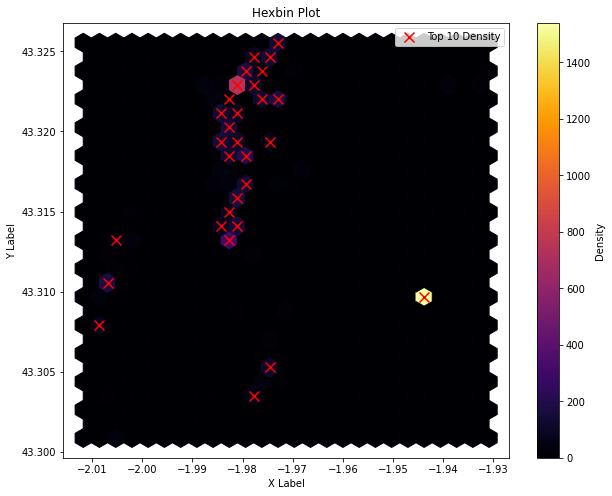

In [43]:

def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    hb = ax.hexbin(x_data, y_data, gridsize=25, cmap='inferno')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    
    # Get hexbin centers and densities
    centers = hb.get_offsets()
    densities = hb.get_array()
    
    # Create a DataFrame with centers and densities
    df_hexbin = pd.DataFrame({'center_x': centers[:, 0], 'center_y': centers[:, 1], 'density': densities})
    
    # Get the 10 hexbins with highest density
    df_top_10_food = df_hexbin.nlargest(30, 'density')
    
    # Plot the hexbin centers with highest density
    ax.scatter(df_top_10_food['center_x'], df_top_10_food['center_y'], color='red', marker='x', s=100, label='Top 10 Density')
    ax.legend()
    
    plt.show()
    
    return df_hexbin



# Generate hexbin plot and get DataFrame with centers and densities
df_centers_densities_food = generate_hexbin_plot(df_food_pt['start_longitude'], df_food_pt['start_latitude'], 'X Label', 'Y Label', 'Hexbin Plot')


In [44]:
df_centers_densities_food

,center_x,center_y,density
0,-2.011742,43.300861,0.0
1,-2.011742,43.302624,0.0
2,-2.011742,43.304386,0.0
3,-2.011742,43.306149,0.0
4,-2.011742,43.307912,0.0
...,...,...,...
735,-1.932501,43.317606,0.0
736,-1.932501,43.319369,0.0
737,-1.932501,43.321131,0.0
738,-1.932501,43.322894,16.0


In [45]:
# Sort the DataFrame by density in descending order and keep the top 10 rows
df_top_10_food = df_centers_densities_food.nlargest(30, 'density')

# Display the DataFrame with the top 10 highest density rows
print(df_top_10_food)

     center_x   center_y  density
320 -1.943821  43.309674   1540.0
528 -1.981016  43.322894    740.0
142 -1.982633  43.313199    311.0
160 -1.979399  43.318487    204.0
192 -1.972930  43.322013    184.0
163 -1.979399  43.323775    178.0
409 -2.006891  43.310556    174.0
524 -1.981016  43.315843    161.0
146 -1.982633  43.320250    154.0
512 -1.984250  43.319369    148.0
557 -1.974547  43.324657    144.0
159 -1.979399  43.316725    142.0
523 -1.981016  43.314081    140.0
194 -1.972930  43.325538    135.0
513 -1.984250  43.321131    131.0
145 -1.982633  43.318487    129.0
177 -1.976164  43.322013    129.0
542 -1.977782  43.322894    124.0
546 -1.974547  43.305268    112.0
526 -1.981016  43.319369    105.0
527 -1.981016  43.321131     93.0
19  -2.008508  43.307912     84.0
543 -1.977782  43.324657     81.0
143 -1.982633  43.314962     80.0
509 -1.984250  43.314081     73.0
554 -1.974547  43.319369     61.0
178 -1.976164  43.323775     60.0
531 -1.977782  43.303505     56.0
37  -2.005273 

In [33]:
#df_top_5.to_csv('/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/preprocessing/food_top5density.csv')
df_top_10_food.to_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Deliveries/deliveries_ss_top30density.csv')

No handles with labels found to put in legend.


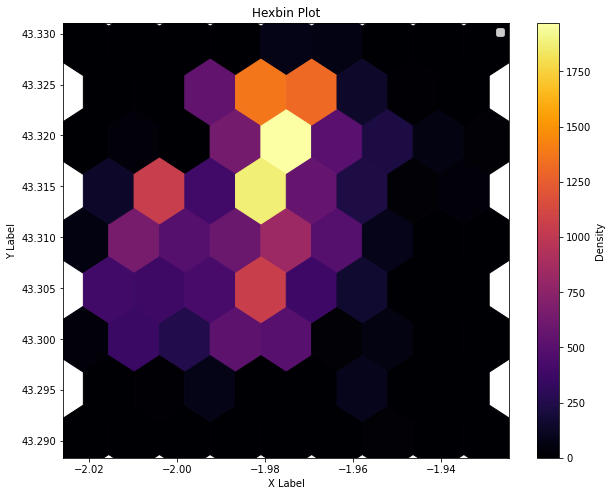

In [51]:

def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    hb = ax.hexbin(x_data, y_data, gridsize=8, cmap='inferno')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    
    # Get hexbin centers and densities
    centers = hb.get_offsets()
    densities = hb.get_array()
    
    # Create a DataFrame with centers and densities
    df_hexbin = pd.DataFrame({'center_x': centers[:, 0], 'center_y': centers[:, 1], 'density': densities})
    
    # Get the 10 hexbins with highest density
    #df_top_10 = df_hexbin.nlargest(10, 'density')
    
    # Plot the hexbin centers with highest density
    #ax.scatter(df_top_10['center_x'], df_top_10['center_y'], color='red', marker='x', s=100, label='Top 10 Density')
    ax.legend()
    
    plt.show()
    
    return df_hexbin

# Generate hexbin plot and get DataFrame with centers and densities
df_centers = generate_hexbin_plot(df_user_pt['start_lon'], df_user_pt['start_lat'], 'X Label', 'Y Label', 'Hexbin Plot')

In [53]:
df_centers.to_csv('/Users/naroacorettisanchez/Documents/GitHub/DataSS/Rides/stations_hexcell.csv')